In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
class LassoRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coefficients = None
        self.lambdas = None

    def soft_threshold(self, lambda_val, x):
        return np.sign(x) * np.maximum(np.abs(x) - lambda_val, 0)

    def centralize(self, X, y, standardize=True):
        X_bar = np.mean(X, axis=0)
        X_centered = X - X_bar
        y_bar = np.mean(y)
        y_centered = y - y_bar
        if standardize:
            X_sd = np.std(X_centered, axis=0, ddof=1)
            X_centered /= X_sd
            return X_centered, y_centered, X_bar, X_sd, y_bar
        return X_centered, y_centered, X_bar, None, y_bar

    def linear_lasso(self, X, y, lambda_val=0.1, eps=1e-6):
        n, p = X.shape
        beta = np.zeros(p)
        prev = np.ones(p)
        X_centered, y_centered, X_bar, X_sd, y_bar = self.centralize(X, y)
        
        while np.sum(np.abs(beta - prev)) > eps:
            prev = beta.copy()
            for j in range(p):
                residual = y_centered - X_centered @ beta + X_centered[:, j] * beta[j]
                rho = X_centered[:, j].T @ residual
                beta[j] = self.soft_threshold(lambda_val, rho) / np.sum(X_centered[:, j] ** 2)
        
        if X_sd is not None:
            beta /= X_sd
        beta_0 = y_bar - X_bar @ beta
        return beta, beta_0

    def run(self, lambda_range=(1e-5, 1e5), num_lambda=50):
        self.lambdas = np.logspace(np.log10(lambda_range[0]), np.log10(lambda_range[1]), num_lambda)
        self.coefficients = []
        
        for lambda_val in self.lambdas:
            beta, _ = self.linear_lasso(self.X, self.y, lambda_val)
            self.coefficients.append(beta)
        
        self.coefficients = np.array(self.coefficients)
        
    def plot(self, lambda_range):
        lambdas_to_plot = [l for l in self.lambdas if lambda_range[0] <= l <= lambda_range[1]]
        indices = [i for i, l in enumerate(self.lambdas) if lambda_range[0] <= l <= lambda_range[1]]
        coefficients_to_plot = self.coefficients[indices]
        
        plt.figure(figsize=(10, 6))
        for i in range(self.X.shape[1]):
            plt.plot(lambdas_to_plot, coefficients_to_plot[:, i], label=f'Beta {i+1}')
        
        plt.xscale('log')
        plt.xlabel('Lambda')
        plt.ylabel('Coefficient value')
        plt.title('LASSO')
        plt.legend()
        plt.grid(True)
        plt.show()

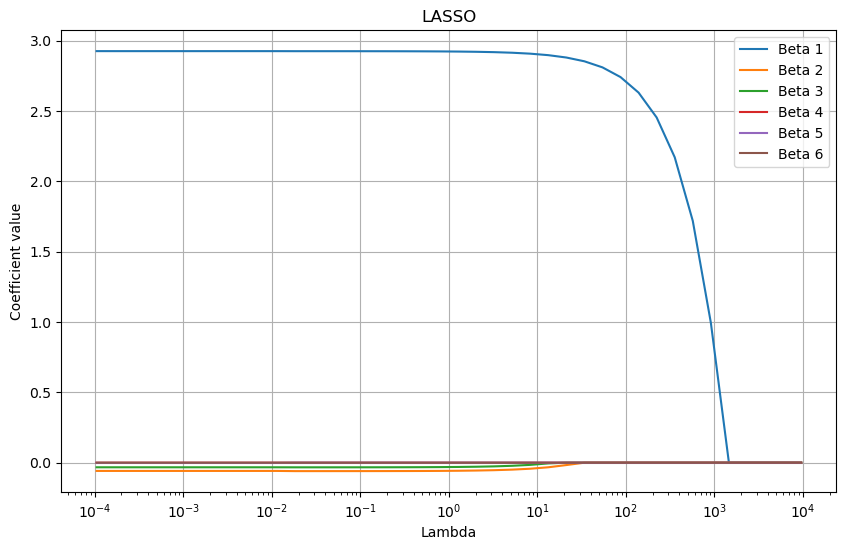

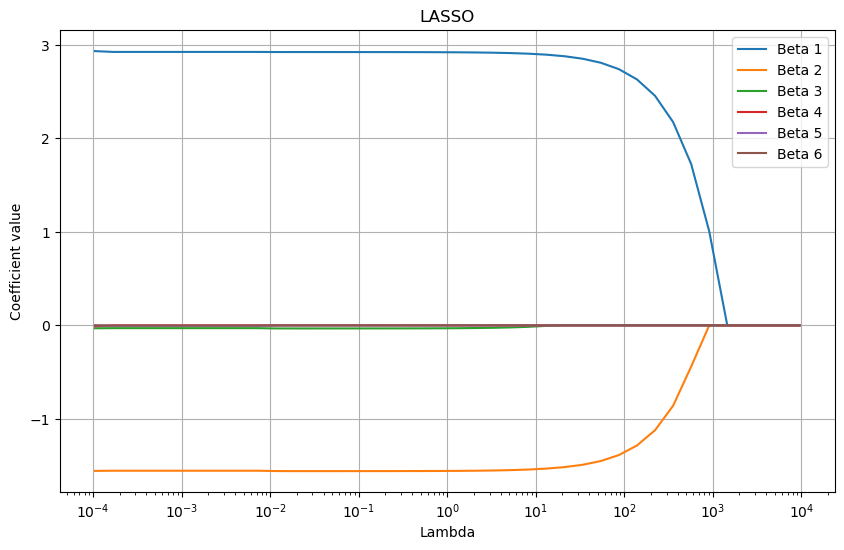

In [39]:
np.random.seed(0)
n = 500
p = 6

z = np.random.normal(size=(n, p))
epsilon = np.random.normal(size=n)

x = np.zeros((n, p))
x[:, 0] = z[:, 0]
x[:, 1] = z[:, 1]
x[:, 2] = z[:, 2]
x[:, 3] = z[:, 0] + (z[:, 1] + z[:, 2]) / 5
x[:, 4] = z[:, 1] + (z[:, 2] + z[:, 0]) / 5
x[:, 5] = z[:, 2] + (z[:, 0] + z[:, 1]) / 5

y1 = 3 * x[:, 0] + 2 * epsilon
y2 = 3 * x[:, 0] - 1.5 * x[:, 1] + 2 * epsilon

lasso_1 = LassoRegression(x, y1)
lasso_1.run(lambda_range=(1e-5, 1e5), num_lambda=50)

lasso_2 = LassoRegression(x, y2)
lasso_2.run(lambda_range=(1e-5, 1e5), num_lambda=50)

lasso_1.plot(lambda_range=(1e-4, 1e4))
lasso_2.plot(lambda_range=(1e-4, 1e4))